In [29]:
# https://www.dropbox.com/s/suxqbrz2woe3os9/Lecture%202.pptx
# http://mechanoid.kiev.ua/ml-regression.html


## Programming Exercise 1 - Linear Regression

- [ÐÐ¾ÑÑÑÐ¾ÐµÐ½Ð¸Ðµ ÐµÐ´Ð¸Ð½Ð¸ÑÐ½Ð¾Ð¹ Ð¼Ð°ÑÑÐ¸ÑÑ](#ÐÐ¾ÑÑÑÐ¾ÐµÐ½Ð¸Ðµ ÐµÐ´Ð¸Ð½Ð¸ÑÐ½Ð¾Ð¹ Ð¼Ð°ÑÑÐ¸ÑÑ)
- [Linear regression with one variable](#Linear-regression-with-one-variable)
- [Gradient Descent](#Gradient-Descent)

In [31]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

#### ÐÐ¾ÑÑÑÐ¾ÐµÐ½Ð¸Ðµ ÐµÐ´Ð¸Ð½Ð¸ÑÐ½Ð¾Ð¹ Ð¼Ð°ÑÑÐ¸ÑÑ

In [32]:
def warmUpExercise():
    return(np.identity(5))

In [33]:
warmUpExercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

### ÐÐ¸Ð½ÐµÐ¹Ð½Ð°Ñ ÑÐµÐ³ÑÐµÑÑÐ¸Ñ Ñ Ð¾Ð´Ð½Ð¾Ð¹ Ð¿ÐµÑÐµÐ¼ÐµÐ½Ð½Ð¾Ð¹

In [34]:
# ÐÐ°Ð³ÑÑÐ¶Ð°ÐµÐ¼ Ð´Ð°Ð½Ð½ÑÐµ Ð¸Ð· AzureML ÑÐµÑÐµÐ· Dataset
from azureml import Workspace
ws = Workspace()
ds = ws.datasets['ex1data.csv']

# Ð numpy Ð½ÐµÑ ÑÑÐµÐ½Ð¸Ñ csv-ÑÐ°Ð¹Ð»Ð° - Ð½Ð¾ Ð¼Ð¾Ð¶Ð½Ð¾ Ð¿ÑÐ¾ÑÐ¸ÑÐ°ÑÑ ÐµÐ³Ð¾ ÐºÐ°Ðº TXT
from numpy import genfromtxt
data = genfromtxt(ds.contents_url,  delimiter=';')

##### ÐÐ¾ÑÐ¼Ð¾ÑÑÐ¸Ð¼ Ð½Ð° Ð´Ð°Ð½Ð½ÑÐµ

In [47]:
data[:5,:] # ÐÐ¾ÑÐ¼Ð¾ÑÑÐ¸Ð¼ Ð½Ð° Ð¿ÐµÑÐ²ÑÐµ 5 ÑÑÑÐ¾Ðº Ð´Ð°Ð½Ð½ÑÑ

array([[  6.1101,  17.592 ],
       [  5.5277,   9.1302],
       [  8.5186,  13.662 ],
       [  7.0032,  11.854 ],
       [  5.8598,   6.8233]])

In [48]:
data.shape[0] # Ð²ÑÐµÐ³Ð¾ ÑÑÑÐ¾Ðº

97

In [49]:
data.shape[1] # Ð²ÑÐµÐ³Ð¾ ÑÑÐ¾Ð»Ð±ÑÐ¾Ð²

2

In [63]:
# ÐÑÐ´ÐµÐ»Ð¸Ð¼ ÑÐµÐ»ÐµÐ²Ð¾Ðµ Ð·Ð½Ð°ÑÐµÐ½Ð¸Ðµ - Ð¾Ð½Ð¾ Ð² Ð¿Ð¾ÑÐ»ÐµÐ´Ð½ÐµÐ¼ ÑÑÐ¾Ð»Ð±ÑÐµ
y = np.c_[data[:,1]]
# ÑÑÐ½ÐºÑÐ¸Ñ np.c_ - ÑÐºÐ»ÐµÐ¸Ð²Ð°ÐµÑ ÑÑÐ¾Ð»Ð±ÑÑ
#data[:, 1].reshape(97,1)

In [64]:
# Ð´Ð¾Ð¿Ð¾Ð»Ð½ÑÐµÐ¼ ÑÑÐ¾Ð»Ð±ÐµÑ Ð¿ÑÐ¸Ð·Ð½Ð°ÐºÐ¾Ð² - ÑÑÐ¾Ð»Ð±ÑÐ¾Ð¼ Ñ ÐµÐ´Ð¸Ð½Ð¸ÑÐºÐ¾Ð¹
X = np.c_[np.ones(data.shape[0]),data[:,0]]
X[:5,]

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598]])

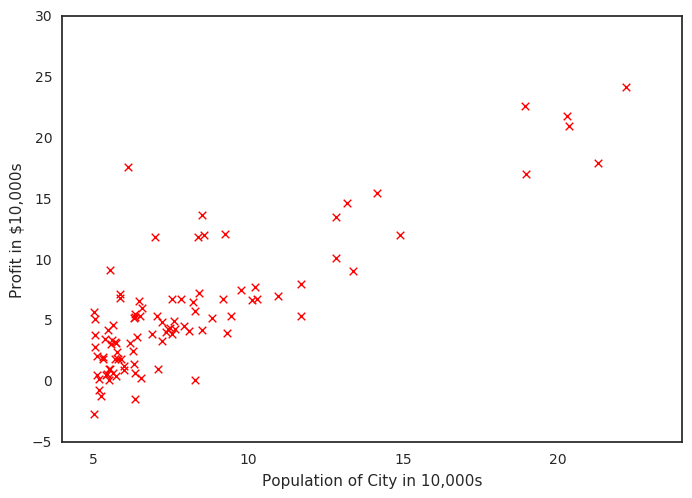

In [36]:
# ÐÐ¾ÑÐ¼Ð¾ÑÑÐ¸Ð¼ Ð½Ð° Ð´Ð°Ð½Ð½ÑÐµ
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

#### Gradient Descent

In [37]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    h = np.dot(X, theta) # !!!!
    J = 1/(2*m)*np.sum(np.square(h-y))
    return(J)

In [38]:
computeCost(X,y)

32.072733877455676

In [68]:
def h(X, theta=[[0.5],[0.6]]):
    return X.dot(theta) # !!!!



In [39]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y)) #!!!!
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

theta:  [-3.63029144  1.16636235]


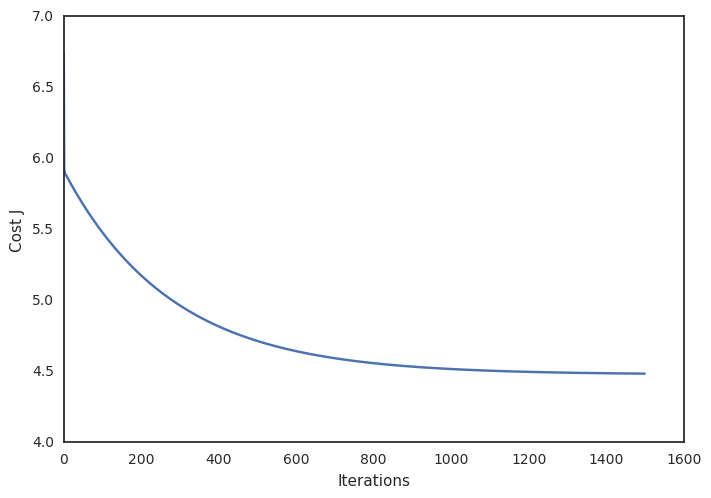

In [40]:
# theta for minimized cost J
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

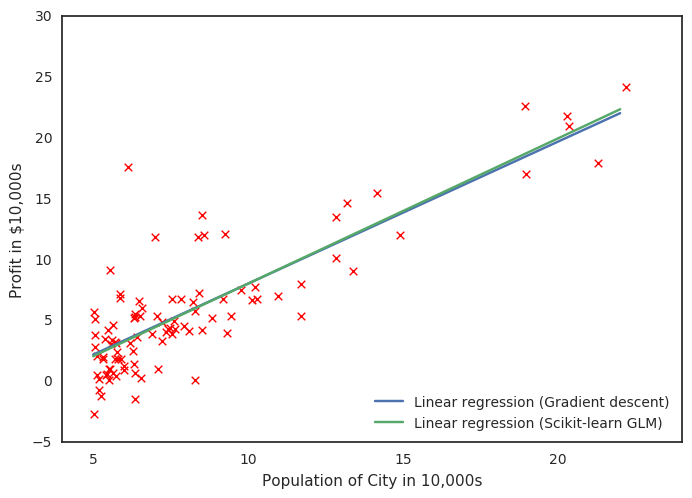

In [41]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx ## !!!!

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [42]:
# Predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[ 4519.7678677]
[ 45342.45012945]


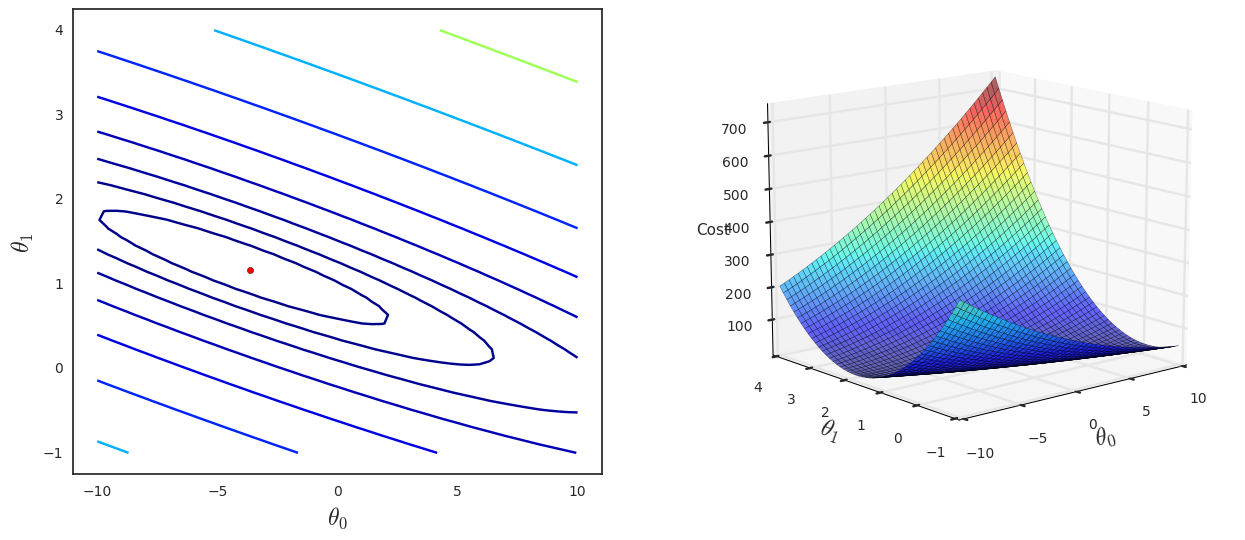

In [43]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)